In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, ridge_regression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

import pickle

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "powerconsumption.csv"

# Load the latest version
data_set = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/electric-power-consumption",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", data_set.head())

/tmp/ipython-input-1980633077.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data_set = kagglehub.load_dataset(


100%|██████████| 1.36M/1.36M [00:00<00:00, 61.2MB/s]

Extracting zip of powerconsumption.csv...


First 5 records:         Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             188

In [3]:
data_set['Datetime'] = pd.to_datetime(data_set['Datetime'], infer_datetime_format=True)

/tmp/ipython-input-3500836945.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_set['Datetime'] = pd.to_datetime(data_set['Datetime'], infer_datetime_format=True)


In [4]:
data_set['Day'] = data_set['Datetime'].dt.day
data_set['Month'] = data_set['Datetime'].dt.month
data_set['Year'] = data_set['Datetime'].dt.year

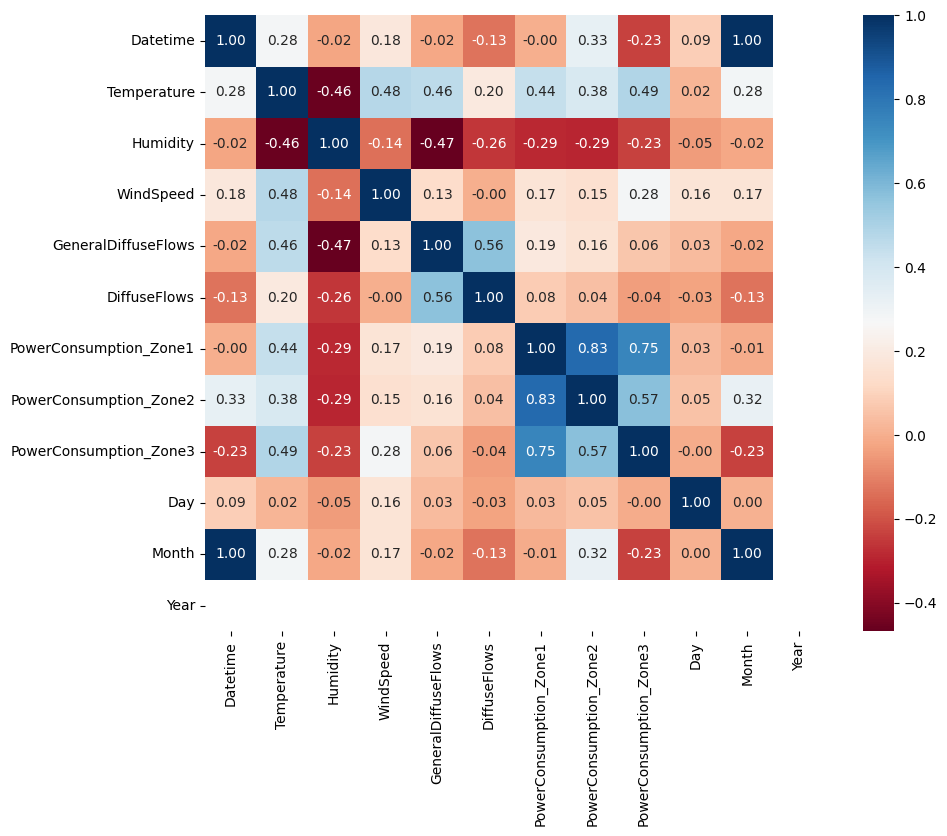

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_set.corr(), cmap='RdBu', annot=True, fmt=".2f")
plt.show()

In [5]:
features = data_set.columns.to_list()
targets = [
    'PowerConsumption_Zone1',
    'PowerConsumption_Zone2',
    'PowerConsumption_Zone3'
    ]

for i in targets:
  features.remove(i)
targets = ['PowerConsumption_Zone1']
features.remove('Datetime')

In [6]:
X = data_set[features]
y = data_set[targets]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_validation_scaled = scaler.transform(X_validation)

In [ ]:
regressor = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [ ]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
print(r2_score(y_validation, regressor.predict(X_validation_scaled)))
print(r2_score(y_train, regressor.predict(X_train_scaled)))

0.22114612414604495
0.22670461616424054


In [ ]:
print(regressor.get_params())
print(lasso.get_params())
print(ridge.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [ ]:
reg_params = {'copy_X': [True], 'fit_intercept': [True], 'n_jobs': [None], 'positive': [True, False]}


lasso_params = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5, 10], 'copy_X': [True], 'fit_intercept': [True], 'max_iter': [100, 500, 1000], 'positive': [False], 'precompute': [False], 'random_state': [None], 'selection': ['cyclic'], 'tol': [0.0001], 'warm_start': [False]}


ridge_params = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0], 'copy_X': [True], 'fit_intercept': [True], 'max_iter': [None], 'positive': [False], 'random_state': [None], 'solver': ['auto'], 'tol': [0.0001]}

In [ ]:
grid_search_reg = GridSearchCV(regressor, reg_params, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search_reg.best_score_

np.float64(-39243569.071815714)

In [ ]:
grid_search_lasso = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5, 10],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [100, 500, 1000], 'positive': [False],
                         'precompute': [False], 'random_state': [None],
                         'selection': ['cyclic'], 'tol': [0.0001],
                         'warm_start': [False]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search_lasso.best_score_

np.float64(-39243568.4514298)

In [ ]:
grid_search_lasso.best_params_

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
grid_search_ridge = GridSearchCV(ridge, ridge_params, cv=5)
grid_search_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [None], 'positive': [False],
                         'random_state': [None], 'solver': ['auto'],
                         'tol': [0.0001]})

In [ ]:
grid_search_ridge.best_score_

np.float64(0.22606328727357497)

In [ ]:
grid_search_ridge.best_params_

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
regressor = LinearRegression(n_jobs=1, fit_intercept=True)

In [ ]:
regressor.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1)

In [ ]:
y_pred = regressor.predict(X_validation_scaled)
regressor.score(X_validation_scaled, y_validation)

0.21894865399384467

In [ ]:
np.mean(y_test), np.std(y_test)

(np.float64(32394.82440903186),
 PowerConsumption_Zone1    7157.816708
 dtype: float64)

In [ ]:
np.mean(y_pred), np.std(y_pred)

(np.float64(32371.932859089793), np.float64(3426.587132020023))

<Axes: ylabel='Count'>

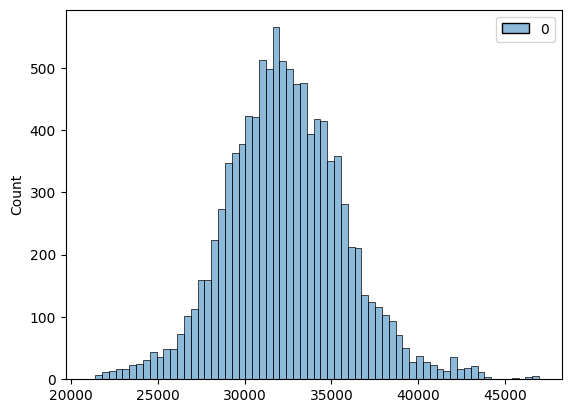

In [ ]:
sns.histplot(y_pred, color='red')

<Axes: ylabel='Count'>

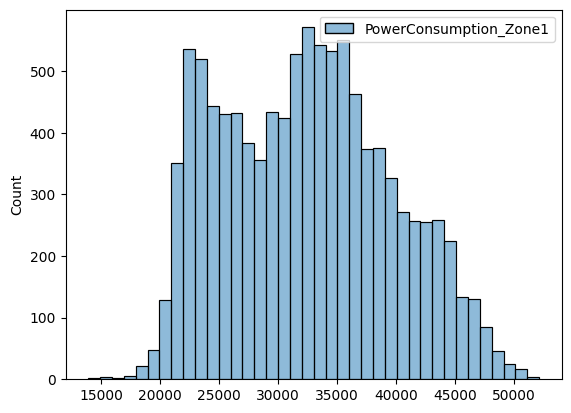

In [ ]:
sns.histplot(y_test, color='yellow')

In [ ]:
regressor.predict([np.array(X_test)[0]])

array([[1932.53003617]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_train = regressor.predict(X_train_scaled)
training_loss = mean_squared_error(y_pred_train, y_train)

In [ ]:
y_test

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
1347,26284.55696,16165.34954,11919.036140
45555,24307.69231,18546.69421,12248.674700
29592,42999.06977,30896.20253,34041.841000
16356,34659.20344,21295.72301,18298.181820
241,29267.84810,20750.15198,16059.759040
...,...,...,...
16325,27088.74058,19697.35234,14103.272730
4723,43547.79661,25900.30395,26166.030150
48302,27327.75665,20634.55048,8810.564226
20800,34232.65574,21046.43963,18510.121460


In [ ]:
y_train

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
24442,37598.94040,23280.24948,21314.95385
2651,30063.79747,19790.88146,14197.59036
39411,32108.53392,17185.89212,12628.81459
7556,33955.93220,21800.60790,15716.98492
18353,35768.65574,22112.69350,16685.34413
...,...,...,...
29022,37609.03654,26768.35443,30426.77824
12864,26777.87234,16982.92683,11549.03226
474,24972.15190,15826.13982,14839.51807
20842,35730.88525,21131.88854,17588.98785


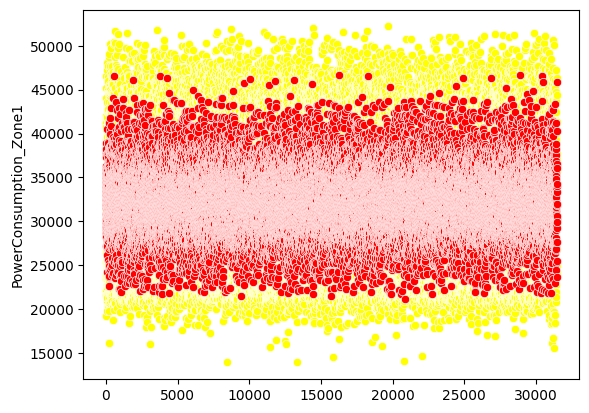

In [ ]:

sns.scatterplot(x=range(1, y_pred_train.shape[0]+1), y=y_train.iloc[:, 0], color='yellow')
sns.scatterplot(x=range(1, y_pred_train.shape[0]+1), y=y_pred_train[:, 0], color='red')
plt.show()

In [ ]:
y_pred_train.shape

(31449, 3)

In [ ]:
print(training_loss)

27895700.355561953


In [ ]:
print(np.sqrt(training_loss))

5281.638037158733


In [ ]:
pred = np.array([29916.162, 21108.912, 14879.802])
truth = np.array([26279.21225, 16584.64730,11846.808510])

In [ ]:
print(np.sqrt((pred-truth)**2))

[3636.94975 4524.2647  3032.99349]
